In [1]:
from snewpy.neutrino import ThreeFlavor, MassHierarchy, MixingParameters, ThreeFlavorMixingParameters,FourFlavorMixingParameters
from snewpy.models import Nakazato_2013
from snewpy.models.ccsn import Fornax_2022, Zha_2021, Tamborra_2014
from snewpy.models.ccsn import Bollig_2016
from snewpy.models.ccsn import Sukhbold_2015

from snewpy.models.ccsn import Warren_2020
from snewpy.flavor_transformation import AdiabaticMSW, NonAdiabaticMSWH, \
                                         TwoFlavorDecoherence, ThreeFlavorDecoherence, \
                                         NeutrinoDecay, AdiabaticMSWes, NonAdiabaticMSWes
#from asteria import set_rcparams
from asteria.simulation import Simulation

import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import LinearNDInterpolator
from scipy.optimize import minimize

from tqdm import tqdm

from astropy import units as u 
from astropy.table import Table

%matplotlib inline

C:\Users\sanya\AppData\Local\Temp\ipykernel_61688\3200589457.py:2: FutureWarning: snewpy.models.Nakazato_2013 is moved to snewpy.models.ccsn.Nakazato_2013
  from snewpy.models import Nakazato_2013


ha


**Generate synthetic dataset using Sukhbold M=9.6, EOS=SFHo, NMO**

In [2]:
data_param=list(params for params in Sukhbold_2015.get_param_combinations() if params['progenitor_mass'].value == 27 
                      and params['eos']=='SFHo')

In [3]:
data_model = {'name': 'Sukhbold_2015',
            'param': data_param[0]
              }

In [5]:
data_sim = Simulation(model=data_model,
                     distance=10 * u.kpc, 
                     Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                     tmin=-10*u.s,  tmax=10*u.s,    dt=1*u.ms,
                     mixing_scheme='AdiabaticMSW',
                     hierarchy='inverted')
data_sim.run()


AssertionError: dm32_2 should be negative for IH

In [5]:
with open("Angle_data_Sukhbold_M=9.6_eos=SFHo_mix=NMO.pkl", 'wb') as f:
    pickle.dump(data_sim, f)

**Prediction datasets: Sukhbold M=9.6, EOS=SFHo; Warren M=9.5, Mixing=1.25; Fornax M=9.5**

In [8]:
param_sukh_sfho=list(params for params in Sukhbold_2015.get_param_combinations() if params['progenitor_mass'].value == 27 
                      and params['eos']=='SFHo')

In [9]:
param_sukh_ls220=list(params for params in Sukhbold_2015.get_param_combinations() if params['progenitor_mass'].value == 27 
                      and params['eos']=='LS220')

In [7]:
pred_forn_param=list(params for params in Fornax_2022.get_param_combinations() if params['progenitor_mass'].value == 26.99)

In [8]:
zha_param=list(params for params in Zha_2021.get_param_combinations() if params['progenitor_mass'].value == 26)

tamb_param=list(params for params in Tamborra_2014.get_param_combinations() if params['progenitor_mass'].value == 27
               and params['direction']==1)

In [10]:
sukh_model_sfho = {'name': 'Sukhbold_2015',
            'param': param_sukh_sfho[0]
              }
sukh_model_ls220 = {'name': 'Sukhbold_2015',
            'param': param_sukh_ls220[0]
              }

In [10]:
forn_model = {'name': 'Fornax_2022',
            'param': pred_forn_param[0]
              }

In [183]:
zha_model = {'name': 'Zha_2021',
            'param': zha_param[0]
              }

tamb_model = {'name': 'Tamborra_2014',
            'param': tamb_param[0]
              }

In [188]:
theta12=np.linspace(4,74,40)*u.deg
sims_sfho=[]
sims_ls220=[]
sims_zha=[]
sims_tamb=[]

for i,t12 in enumerate(theta12):
    pred_sukh_sfho = Simulation(model=sukh_model_sfho,
                                     distance=10 * u.kpc, 
                                     Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                                     tmin=-10*u.s,  tmax=10*u.s,    dt=1*u.ms,
                                     mixing_scheme='AdiabaticMSW',
                                     theta12=t12,
                                     hierarchy='normal')
    pred_sukh_sfho.run()
    #with open("ThreeFlavor_Sukhbold_M=27_eos=SFHo_mix=NMO_t23={}.pkl".format(t23), 'wb') as f:
            #pickle.dump(pred_sukh_sfho, f)
    sims_sfho.append(pred_sukh_sfho)

    pred_sukh_ls220 = Simulation(model=sukh_model_ls220,
                                     distance=10 * u.kpc, 
                                     Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                                     tmin=-10*u.s,  tmax=10*u.s,    dt=1*u.ms,
                                     mixing_scheme='AdiabaticMSW',
                                     theta12=t12,
                                     hierarchy='normal')
    pred_sukh_ls220.run()
    #with open("ThreeFlavor_Sukhbold_M=27_eos=SFHo_mix=NMO_t23={}.pkl".format(t23), 'wb') as f:
            #pickle.dump(pred_sukh_ls220, f)
    sims_ls220.append(pred_sukh_ls220)
    
    pred_zha = Simulation(model=zha_model,
                                     distance=10 * u.kpc, 
                                     Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                                     tmin=-10*u.s,  tmax=10*u.s,    dt=1*u.ms,
                                     mixing_scheme='AdiabaticMSW',
                                     theta12=t12,
                                     hierarchy='normal')
    pred_zha.run()
    sims_zha.append(pred_zha)
    
    
    pred_tamb = Simulation(model=tamb_model,
                                     distance=10 * u.kpc, 
                                     Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                                     tmin=-10*u.s,  tmax=10*u.s,    dt=1*u.ms,
                                     mixing_scheme='AdiabaticMSW',
                                     theta12=t12,
                                     hierarchy='normal')
    pred_tamb.run()
    sims_tamb.append(pred_tamb)

In [170]:
theta12=np.linspace(31.61,36.27,20)*u.deg
theta13=np.linspace(.61,16.61,20)*u.deg
deltaCP=np.linspace(125,392,20)*u.deg
dm21_2=np.linspace(6.79e-5,8.01e-5,20)*u.eV**2
dm31_2=np.linspace(2.427e-3,2.625e-3,20)*u.eV**2
sims_sfho=[]

for i,d31 in enumerate(dm31_2):
    pred_sukh_sfho = Simulation(model=sukh_model_sfho,
                                     distance=10 * u.kpc, 
                                     Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                                     tmin=-10*u.s,  tmax=10*u.s,    dt=1*u.ms,
                                     mixing_scheme='AdiabaticMSW',
                                     dm31_2=d31,
                                     hierarchy='normal')
    pred_sukh_sfho.run()
    with open("ThreeFlavor_Sukhbold_M=27_eos=SFHo_mix=NMO_dm31={}.pkl".format(d31), 'wb') as f:
            pickle.dump(pred_sukh_sfho, f)
    sims_sfho.append(pred_sukh_sfho)

In [11]:
theta12=np.linspace(31.61,36.27,20)*u.deg
sims_forn=[]

for i,t12 in enumerate(theta12):
    pred_forn = Simulation(model=forn_model,
                                     distance=10 * u.kpc, 
                                     Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                                     tmin=-10*u.s,  tmax=10*u.s,    dt=1*u.ms,
                                     mixing_scheme='AdiabaticMSW',
                                     theta12=t12,
                                     hierarchy='normal')
    pred_forn.run()
    with open("ThreeFlavor_Fornax_M=26.99_mix=NMO_t12={}.pkl".format(t12), 'wb') as f:
            pickle.dump(pred_forn, f)
    sims_forn.append(pred_forn)

Expect a reduction in performance and increase in simulation run times.
Expect a reduction in performance and increase in simulation run times.
Expect a reduction in performance and increase in simulation run times.
Expect a reduction in performance and increase in simulation run times.
Expect a reduction in performance and increase in simulation run times.
Expect a reduction in performance and increase in simulation run times.
Expect a reduction in performance and increase in simulation run times.
Expect a reduction in performance and increase in simulation run times.
Expect a reduction in performance and increase in simulation run times.
Expect a reduction in performance and increase in simulation run times.
Expect a reduction in performance and increase in simulation run times.
Expect a reduction in performance and increase in simulation run times.
Expect a reduction in performance and increase in simulation run times.
Expect a reduction in performance and increase in simulation run

In [17]:
theta12=np.linspace(31.61,36.27,20)*u.deg
sims_sfho=[]
sims_ls220=[]

for i,t12 in enumerate(theta12):
    pred_sukh_sfho = Simulation(model=sukh_model_sfho,
                                     distance=10 * u.kpc, 
                                     Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                                     tmin=-10*u.s,  tmax=10*u.s,    dt=1*u.ms,
                                     mixing_scheme='AdiabaticMSW',
                                     theta12=t12,
                                     hierarchy='normal')
    pred_sukh_sfho.run()
    sims_sfho.append(pred_sukh_sfho)

In [11]:
theta12=[25,40]
sukh_sims=[]
forn_sims=[]
warr_sims=[]

for i,t12 in enumerate(theta12):
    with open("ThreeFlavor_Sukhbold_M=27_eos=SFHo_mix=NMO_t12={}_t13={}.pkl".format(t12,8.5), 'rb') as f:
        pred_sukh=pickle.load(f)
    sukh_sims.append(pred_sukh)

    with open("ThreeFlavor_Fornax_M=26.99_mix=NMO_t12={}_t13={}.pkl".format(t12,8.5), 'rb') as f:
        pred_forn=pickle.load(f)
    forn_sims.append(pred_forn)

In [12]:
def compute_hits(dist,dt,start,end,sim):
    sim.rebin_result(dt)
    sim.scale_result(dist)
    t, hits = sim.detector_signal(dt)
    id5=np.where(t==start)[0][0]
    id6=np.where(t==end)[0][0]
        
    data=hits[id5:id6]
    return data 

In [13]:
def compute_hits_with_bg(dist,dt,start,end,sim):
    sim.rebin_result(dt)
    sim.scale_result(dist)
    t, hits = sim.detector_signal(dt)
    bg1 = sim.detector.i3_bg(dt,size=hits.size) + sim.detector.dc_bg(dt,size=hits.size)
    sig=bg1+hits
    id1=np.where(t==-5*u.s)[0][0]
    id2=np.where(t==-.5*u.s)[0][0]
    id5=np.where(t==start)[0][0]
    id6=np.where(t==end)[0][0]

    mean_under=np.mean(sig[id1:id2])
    data_hits=np.subtract(sig,mean_under)[id5:id6]
    return data_hits

In [14]:
data_hits=compute_hits_with_bg(1*u.kpc,50*u.ms,.05*u.s,1*u.s,data_sim)
norm_data_hits=data_hits/np.sum(data_hits)

In [18]:
hits_sfho=[]
hits_ls220=[]
norm_hits_sfho=[]
norm_hits_ls220=[]
for i in range(20):
    data=compute_hits(1*u.kpc,50*u.ms,.05*u.s,1*u.s,sims_sfho[i])
    hits_sfho.append(data)
    norm_hits_sfho.append(data/np.sum(data))
    """
    data=compute_hits(1*u.kpc,50*u.ms,.05*u.s,1*u.s,sims_ls220[i])
    hits_ls220.append(data)
    norm_hits_ls220.append(data/np.sum(data))
    """

In [19]:
data_sim.rebin_result(50*u.ms)
t, hits = data_sim.detector_signal(50*u.ms)
id5=np.where(t==.05*u.s)[0][0]
id6=np.where(t==1*u.s)[0][0]

Text(0.5, 1.0, 'Signal for Models with M=27, EOS=SFHo, d=10kpc, 50ms binning')

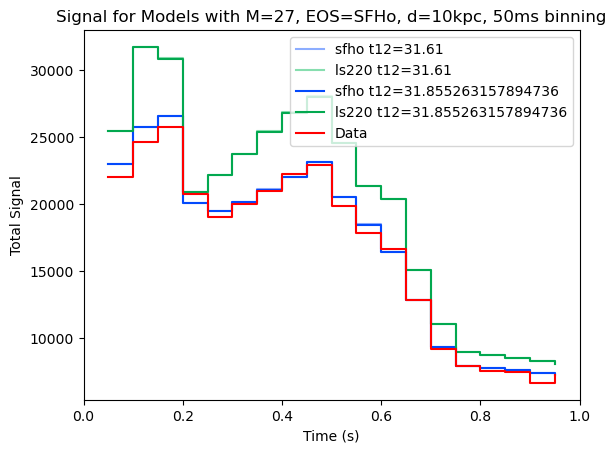

In [105]:
#dt = 10 * u.ms
colors_forn=['#8cadff','#0349fc']
colors_sukh=['#87deaf','#02a84f']
labels=['Data','Prediction']

for i in range(2):
    plt.step(t[id5:id6], hits_sfho[i], where='post',color=colors_forn[i],label=f'sfho t12={theta12[i]}')
    plt.step(t[id5:id6], hits_ls220[i], where='post',color=colors_sukh[i],label=f'ls220 t12={theta12[i]}')

plt.step(t[id5:id6], data_hits,color='red',label='Data',where='post')

plt.legend(loc='upper right')
plt.xlim(0,1)
#plt.ylim(0,1.1e6)
plt.xlabel('Time (s)')
plt.ylabel('Total Signal')
plt.title('Signal for Models with M=27, EOS=SFHo, d=10kpc, 50ms binning')

Text(0.5, 1.0, 'Normalized Signal for Models with M=27 d=10kpc, 50ms binning')

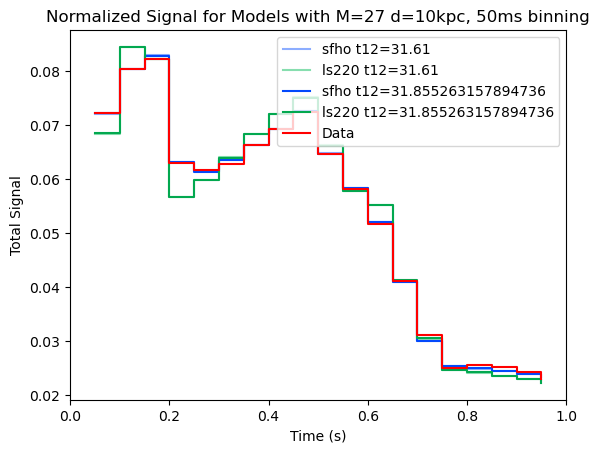

In [112]:
#dt = 10 * u.ms
colors_forn=['#8cadff','#0349fc']
colors_sukh=['#87deaf','#02a84f']
labels=['Data','Prediction']

for i in range(2):
    plt.step(t[id5:id6], norm_hits_sfho[i], where='post',color=colors_forn[i],label=f'sfho t12={theta12[i]}')
    plt.step(t[id5:id6], norm_hits_ls220[i], where='post',color=colors_sukh[i],label=f'ls220 t12={theta12[i]}')

plt.step(t[id5:id6], norm_data_hits,color='red',label='Data',where='post')

plt.legend(loc='upper right')
plt.xlim(0,1)
#plt.ylim(0,1.1e6)
plt.xlabel('Time (s)')
plt.ylabel('Total Signal')
plt.title('Normalized Signal for Models with M=27 d=10kpc, 50ms binning')

Text(0.5, 1.0, 'Sukhbold with M=27, EOS=SFHo, d=1kpc, theta_12 from 30 to 36')

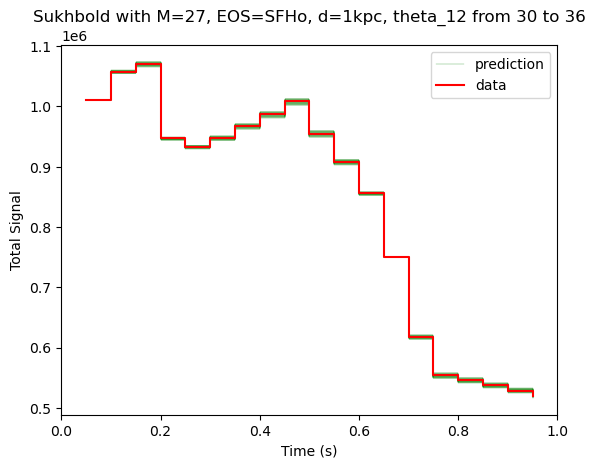

In [20]:
dt = 50 * u.ms
colors=['blue','red']
labels=['Data','Prediction']


for i in range(20):
    if i==0:
        plt.step(t[id5:id6], hits_sfho[i], where='post',lw=.2,color='green',label='prediction')
    else:
        plt.step(t[id5:id6], hits_sfho[i], where='post',lw=.2,color='green')
        
plt.step(t[id5:id6], data_hits,color='red',label='data',where='post')
    


plt.legend()
plt.xlim(0,1)
plt.xlabel('Time (s)')
plt.ylabel('Total Signal')
plt.title('Sukhbold with M=27, EOS=SFHo, d=1kpc, theta_12 from 30 to 36')

In [21]:
def compute_chi_sq_norm(pred,dat):
    chi_sq=0
    for i in range(len(pred)):
        chi_sq = chi_sq + ((pred[i]-dat[i])**2)/(1/dat[i])
    return chi_sq

In [22]:
def compute_chi_sq(pred,dat):
    chi_sq=0
    for i in range(len(pred)):
        chi_sq = chi_sq + ((pred[i]-dat[i])**2)/(dat[i])
    return chi_sq

In [63]:
def hits_to_plot_no_norm(model_sim, data_sim, dt, dist,thetas, x_lab, title, acc, errs):
    """
    model_sim: simulation model
    data_sim: data simulation
    dt: time binning
    thetas: array of params in model simulations
    x_lab: x label for plot
    title: title for plot
    acc: actual parameter value
    errs: number of datasets to generate
    """
    fig, ax = plt.subplots(figsize=(10.6, 5))
    if(errs==1):
        data_hits=compute_hits_with_bg(dist,dt,.05*u.s,1*u.s,data_sim)
        
        hits_mod=[]
        chis=[]
        for i in range(len(model_sim)):
            data=compute_hits(dist,dt,.05*u.s,1*u.s,model_sim[i])
            hits_mod.append(data)
            chis.append(compute_chi_sq(hits_mod[i],data_hits))
            
        ax.scatter(thetas,chis,color='#9b30b3')
        ax.axvline(x=acc, color='#10911b',label=r'Accepted $\theta_{12}$ Value')
        ax.axvline(x=thetas[np.argmin(chis)], color='#9b30b3', linestyle='--',label='Minimum $\chi^2$')
        ax.legend(fontsize=14)
        ax.set_xlabel(x_lab,fontsize=20)
        ax.set_ylabel('$\chi^2$',fontsize=20)
        ax.set_title(title,fontsize=20)
            
    else:
        datas=[]
        for i in range(errs):
            data_hits=compute_hits_with_bg(dist,dt,.05*u.s,1*u.s,data_sim)
            datas.append(data_hits)
        
        chi_meds=[]
        chi_16=[]
        chi_84=[]
        hits_mod=[]
        for i in range(len(model_sim)):
            chis=[]
            data=compute_hits(dist,dt,.05*u.s,1*u.s,model_sim[i])
            hits_mod.append(data)
            
            for j in range(len(datas)):
                chis.append(compute_chi_sq(hits_mod[i],datas[j]))
                
            chi_meds.append(np.median(chis))
            chi_16.append(np.percentile(chis, 16))
            chi_84.append(np.percentile(chis, 84))
            
        ax.scatter(thetas,chi_meds,color='#9b30b3')
        ax.fill_between(thetas, chi_16, chi_84, color='#d181f7', alpha=0.3, label='Middle 68%')
        #ax.axhline(y=min(chi_meds)+1, color='#10911b',label='Min Chi Sq + 1')
        ax.axvline(x=acc, color='#10911b',label='Accepted Value')
        ax.axvline(x=thetas[np.argmin(chi_meds)], color='#d619f7', linestyle='--',label='Minimum Chi Sq')
        ax.legend()
        ax.set_xlabel(x_lab,fontsize=17)
        ax.set_ylabel('$\chi^2$',fontsize=17)
        ax.set_title(title,fontsize=20)
        
    return fig

In [24]:
def hits_to_plot_norm(model_sim, data_sim, dt, dist,thetas, x_lab, title, acc, errs):
    """
    model_sim: simulation model
    data_sim: data simulation
    dt: time binning
    thetas: array of params in model simulations
    x_lab: x label for plot
    title: title for plot
    acc: actual parameter value
    errs: number of datasets to generate
    """
    fig, ax = plt.subplots()
    if(errs==1):
        data_hits=compute_hits_with_bg(dist,dt,.05*u.s,1*u.s,data_sim)
        norm_data_hits=data_hits/np.sum(data_hits)
        
        norm_hits_mod=[]
        chis=[]
        for i in range(len(model_sim)):
            data=compute_hits(dist,dt,.05*u.s,1*u.s,model_sim[i])
            norm_hits_mod.append(data/np.sum(data))
            chis.append(compute_chi_sq_norm(norm_hits_mod[i],norm_data_hits))
            
        ax.scatter(thetas,chis)
        #ax.axvline(x=acc, color='red', linestyle='--',label='Accepted Value')
        ax.axvline(x=thetas[np.argmin(chis)], color='r', linestyle='--',label='Minimum Chi Sq')
        ax.legend()
        ax.set_xlabel(x_lab)
        ax.set_ylabel('$\chi^2$')
        ax.set_title(title)
            
    else:
        datas=[]
        for i in range(errs):
            data_hits=compute_hits_with_bg(dist,dt,.05*u.s,1*u.s,data_sim)
            norm_data_hits=data_hits/np.sum(data_hits)
            datas.append(norm_data_hits)
        chi_meds=[]
        chi_16=[]
        chi_84=[]
        norm_hits_mod=[]
        for i in range(len(model_sim)):
            chis=[]
            data=compute_hits(dist,dt,.05*u.s,1*u.s,model_sim[i])
            norm_hits_mod.append(data/np.sum(data))
            
            for j in range(len(datas)):
                chis.append(compute_chi_sq_norm(norm_hits_mod[i],datas[j]))
                
            chi_meds.append(np.median(chis))
            chi_16.append(np.percentile(chis, 16))
            chi_84.append(np.percentile(chis, 84))
            
        ax.scatter(thetas,chi_meds,color='#9b30b3')
        ax.fill_between(thetas, chi_16, chi_84, color='#d181f7', alpha=0.3, label='Middle 68%')
        ax.axvline(x=acc, color='#10911b',label='Accepted Value')
        ax.axvline(x=thetas[np.argmin(chi_meds)], color='#d619f7', linestyle='--',label='Minimum Chi Sq')
        ax.legend()
        ax.set_xlabel(x_lab)
        ax.set_ylabel('$\chi^2$')
        ax.set_title(title)
        
    return fig

In [25]:
def hits_to_plot_model_ind(model_sims, data_sim, dt, thetas, x_lab, title, acc, errs,colors,mod_names):
    """
    model_sim: simulation models
    data_sim: data simulation
    dt: time binning
    thetas: array of params in model simulations
    x_lab: x label for plot
    title: title for plot
    acc: actual parameter value
    errs: number of datasets to generate
    """
    fig, ax = plt.subplots()
    datas=[]
    for i in range(errs):
        data_hits=compute_hits_with_bg(5*u.kpc,dt,.05*u.s,1*u.s,data_sim)
        norm_data_hits=data_hits/np.sum(data_hits)
        datas.append(norm_data_hits)
    for i in range(len(model_sims)):
        chi_meds=[]
        chi_16=[]
        chi_84=[]
        norm_hits_mod=[]
        for j in range(len(model_sims[i])):
            chis=[]
            data=compute_hits(5*u.kpc,dt,.05*u.s,1*u.s,model_sims[i][j])
            norm_hits_mod.append(data/np.sum(data))

            for k in range(len(datas)):
                chis.append(compute_chi_sq_norm(norm_hits_mod[j],datas[k]))

            chi_meds.append(np.median(chis))
            chi_16.append(np.percentile(chis, 16))
            chi_84.append(np.percentile(chis, 84))

        ax.plot(thetas,chi_meds,color=colors[i],alpha=.4)
        ax.axvline(x=thetas[np.argmin(chi_meds)], color=colors[i], linestyle='--',label=f'{mod_names[i]}')
        
    ax.axvline(x=acc, color='orange', linestyle='--',label='Accepted Value')
    ax.legend()
    ax.set_yscale('log')
    ax.set_xlabel(x_lab)
    ax.set_ylabel('$\chi^2$')
    ax.set_title(title)
        
    return fig

In [26]:
def hits_to_sens(model_sim, data_sim, dt, dist,thetas, errs):
    """
    model_sim: simulation model
    data_sim: data simulation
    dt: time binning
    dist: progenitor distance in kpc
    errs: number of datasets to generate
    """
    if(errs==1):
        data_hits=compute_hits_with_bg(dist,dt,.05*u.s,1*u.s,data_sim)
        
        hits_mod=[]
        chis=[]
        for i in range(len(model_sim)):
            data=compute_hits(dist,dt,.05*u.s,1*u.s,model_sim[i])
            hits_mod.append(data)
            chis.append(compute_chi_sq_norm(hits_mod[i],data_hits))
            
        return(np.min(chis),thetas[np.argmin(chis)],model_sim[np.argmin(chis)],data_hits)
            
    else:
        datas=[]
        for i in range(errs):
            data_hits=compute_hits_with_bg(dist,dt,.05*u.s,1*u.s,data_sim)
            datas.append(data_hits)
        
        chi_meds=[]
        chi_16=[]
        chi_84=[]
        hits_mod=[]
        for i in range(len(model_sim)):
            chis=[]
            data=compute_hits(dist,dt,.05*u.s,1*u.s,model_sim[i])
            hits_mod.append(data)
            
            for j in range(len(datas)):
                chis.append(compute_chi_sq_norm(hits_mod[i],datas[j]))
                
            chi_meds.append(np.median(chis))
            chi_16.append(np.percentile(chis, 16))
            chi_84.append(np.percentile(chis, 84))
            
        return(np.min(chi_meds),thetas[np.argmin(chi_meds)],model_sim[np.argmin(chis)])

In [27]:
def hits_to_thetas(model_sim, data_sim, dt, dist,thetas, errs):
    """
    model_sim: simulation model
    data_sim: data simulation
    dt: time binning
    dist: progenitor distance in kpc
    errs: number of datasets to generate
    """
    if(errs==1):
        data_hits=compute_hits_with_bg(dist,dt,.05*u.s,1*u.s,data_sim)
        
        hits_mod=[]
        chis=[]
        for i in range(len(model_sim)):
            data=compute_hits(dist,dt,.05*u.s,1*u.s,model_sim[i])
            hits_mod.append(data)
            chis.append(compute_chi_sq_norm(hits_mod[i],data_hits))
            
        return(np.min(chis),thetas[np.argmin(chis)])
            
    else:
        datas=[]
        for i in range(errs):
            data_hits=compute_hits_with_bg(dist,dt,.05*u.s,1*u.s,data_sim)
            datas.append(data_hits)
            
        hits_mod=[]
        for j in range(len(model_sim)):
            data=compute_hits(dist,dt,.05*u.s,1*u.s,model_sim[j])
            hits_mod.append(data)
        
        chi_mins=[]
        theta_mins=[]

        for i in range(errs):
            chis=[]
            for j in range(len(model_sim)):
                chis.append(compute_chi_sq_norm(hits_mod[j],datas[i]))
            chi_mins.append(min(chis))
            theta_mins.append(thetas[np.argmin(chis)])
            
        return(chi_mins,theta_mins)

In [28]:
def theta_interp(param, model_sims, data_hits, thetas, dist, dt):
    model_sims[0].rebin_result(dt)
    t, hits = model_sims[0].detector_signal(dt)
    id5=np.where(t==.05*u.s)[0][0]
    id6=np.where(t==1*u.s)[0][0]
    times=t[id5:id6]
    
    mod_hits=[]
    for i in range(len(model_sims)):
        data=compute_hits(dist,dt,.05*u.s,1*u.s,model_sims[i])
        mod_hits.append(data)
        
    theta_grid, x_grid = np.meshgrid(thetas, times.value, indexing='ij')
    theta_flat = theta_grid.flatten()
    x_flat = x_grid.flatten()
    z_flat = np.array(mod_hits).flatten()
    
    points = np.vstack((theta_flat, x_flat)).T
    interpolator = LinearNDInterpolator(points, z_flat)
    
    new_theta = param
    new_curve = interpolator(param, times.value)
    return compute_chi_sq(new_curve,data_hits)

In [31]:
def sims_to_theta_min(model_sims, data_sim, thetas, dist, dt,errs):
    theta_mins=[]
    for i in tqdm(range(errs)):
        data_hits=compute_hits_with_bg(dist, dt, .05*u.s, 1*u.s, data_sim)
        theta_guess=33
        res = minimize(theta_interp, theta_guess, args=(model_sims, data_hits, thetas, dist, dt), method='Nelder-Mead')
        popt=res.x
        theta_mins.append(popt[0])
        
    return theta_mins

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [08:25<00:00,  1.98it/s]


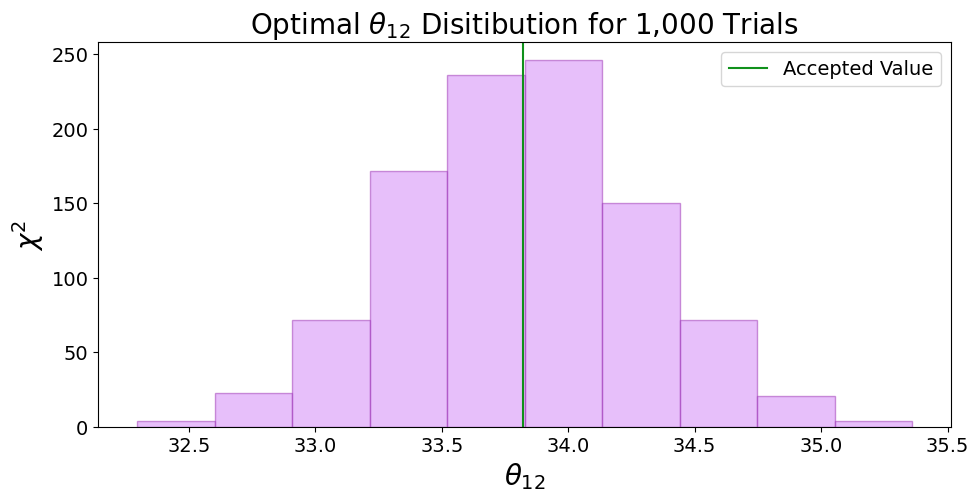

In [58]:
theta_mins=sims_to_theta_min(sims_sfho,data_sim,np.linspace(31.61,36.27,20),5*u.kpc,50*u.ms,1000)
plt.figure(figsize=(11, 5))
plt.hist(theta_mins,alpha=.5,color='#d181f7',edgecolor='#9b30b3',bins=10)
plt.xlabel(r'$\theta_{12}$',fontsize=20)
plt.axvline(x=33.82, color='#10911b',label='Accepted Value')
plt.title(r'Optimal $\theta_{12}$ Disitibution for 1,000 Trials',fontsize=20)
plt.ylabel(r'$\chi^2$',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14)
plt.savefig('chi_min.png', dpi=300, bbox_inches='tight')

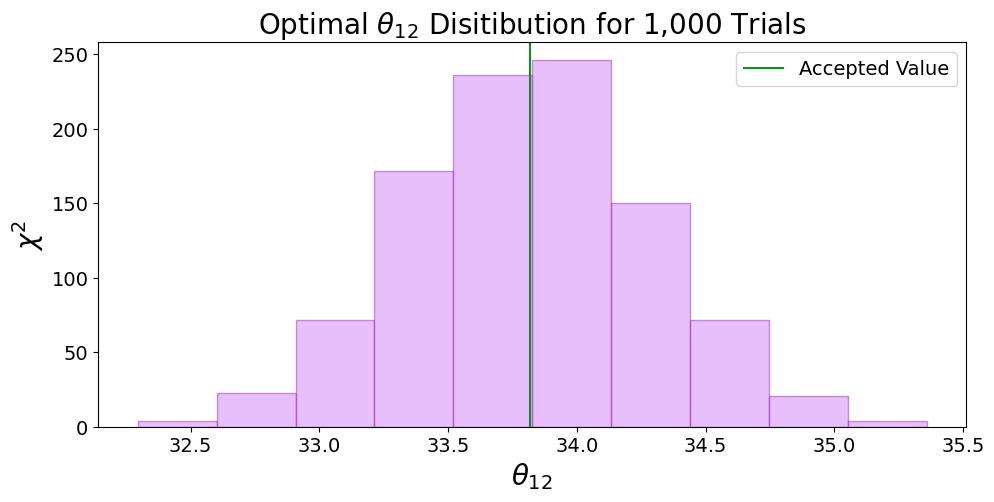

In [62]:
plt.figure(figsize=(11.2, 5))
plt.hist(theta_mins,alpha=.5,color='#d181f7',edgecolor='#9b30b3',bins=10)
plt.xlabel(r'$\theta_{12}$',fontsize=20)
plt.axvline(x=33.82, color='#10911b',label='Accepted Value')
plt.title(r'Optimal $\theta_{12}$ Disitibution for 1,000 Trials',fontsize=20)
plt.ylabel(r'$\chi^2$',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14)
plt.savefig('chi_min.png', dpi=300, bbox_inches='tight')

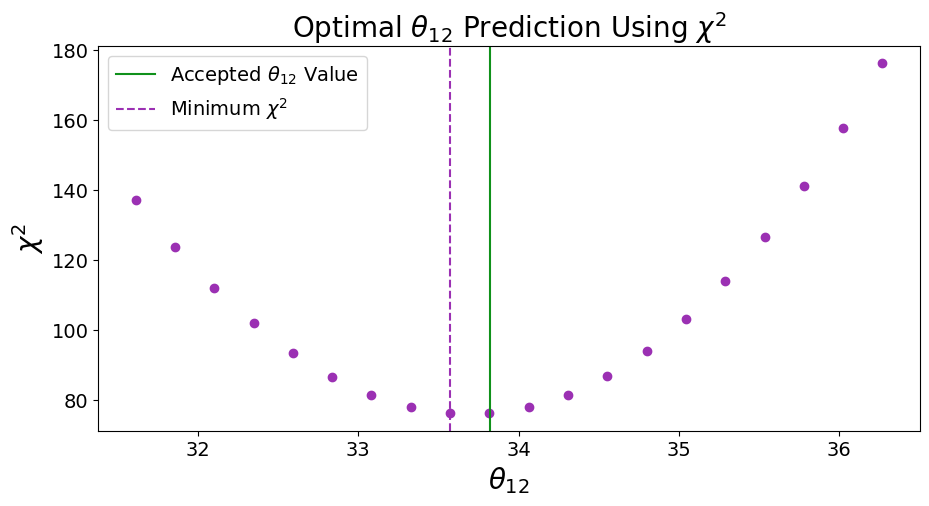

In [66]:
fig = hits_to_plot_no_norm(sims_sfho, data_sim, 50*u.ms,5*u.kpc,np.linspace(31.61,36.27,20), 
                   r'$\theta_{12}$', r'Optimal $\theta_{12}$ Prediction Using $\chi^2$', 33.82, 1)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('chi_min1.png', dpi=300, bbox_inches='tight')

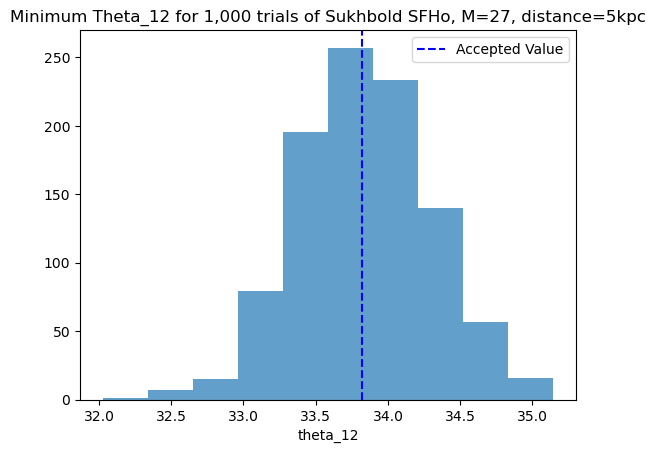

In [67]:
plt.hist(theta_mins,alpha=.7)
plt.xlabel('theta_12')
plt.axvline(x=33.82, color='blue',linestyle='--',label='Accepted Value')
plt.title('Minimum Theta_12 for 1,000 trials of Sukhbold SFHo, M=27, distance=5kpc')
plt.legend()

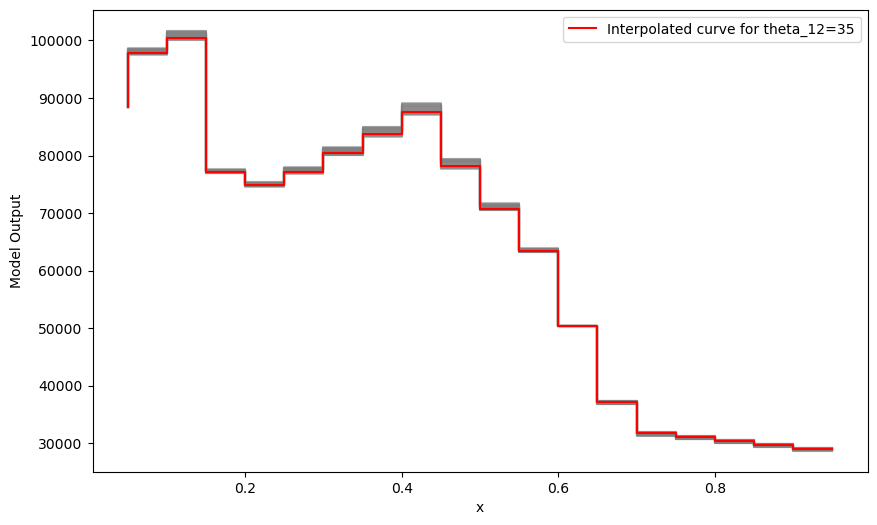

In [42]:
model_sims=sims_sfho
thetas=np.linspace(31.61,36.27,20)
dist=5*u.kpc
dt=50*u.ms

data_hits=compute_hits_with_bg(dist, dt, .05*u.s, 1*u.s, data_sim)
data_sim.rebin_result(dt)
t, hits = data_sim.detector_signal(dt)
id5=np.where(t==.05*u.s)[0][0]
id6=np.where(t==1*u.s)[0][0]
times=t[id5:id6]
mod_hits=[]
for i in range(len(model_sims)):
    data=compute_hits(dist,dt,.05*u.s,1*u.s,model_sims[i])
    mod_hits.append(data)
        
    
    
theta_grid, x_grid = np.meshgrid(thetas, times.value, indexing='ij')
theta_flat = theta_grid.flatten()
x_flat = x_grid.flatten()
z_flat = np.array(mod_hits).flatten()
    
points = np.vstack((theta_flat, x_flat)).T
interpolator = LinearNDInterpolator(points, z_flat)



new_theta_12 = 35

# Interpolate the new model curve
new_curve = interpolator(new_theta_12, times.value)

# Plot the result
plt.figure(figsize=(10, 6))
for curve in mod_hits:
    plt.step(times, curve, color='gray', alpha=0.5)
plt.step(times, new_curve, color='red', label=f'Interpolated curve for theta_12={new_theta_12}')
plt.xlabel('x')
plt.ylabel('Model Output')
plt.legend()
plt.show()


In [36]:
chi_sfho=[]
chi_ls220=[]
for i in range(20):
    chi_sfho.append(compute_chi_sq_norm(norm_hits_sfho[i],norm_data_hits))
    chi_ls220.append(compute_chi_sq_norm(norm_hits_ls220[i],norm_data_hits))

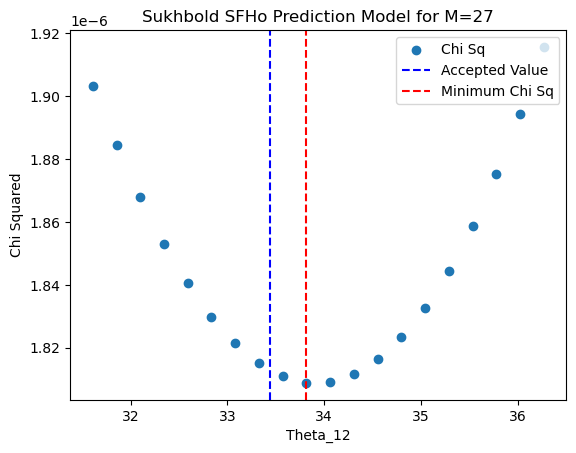

In [38]:
plt.scatter(theta12,chi_sfho,label='Chi Sq')
theta12=np.linspace(31.61,36.27,20)
plt.axvline(x=33.44, color='blue', linestyle='--',label='Accepted Value')
plt.axvline(x=theta12[np.argmin(chi_sfho)], color='r', linestyle='--',label='Minimum Chi Sq')
plt.xlabel('$\theta_{12}$')
plt.ylabel('$\chi^2$')
plt.title('Sukhbold $\theta_{12}$ Prediction')
plt.legend()

In [178]:
len(sims_sfho)

21

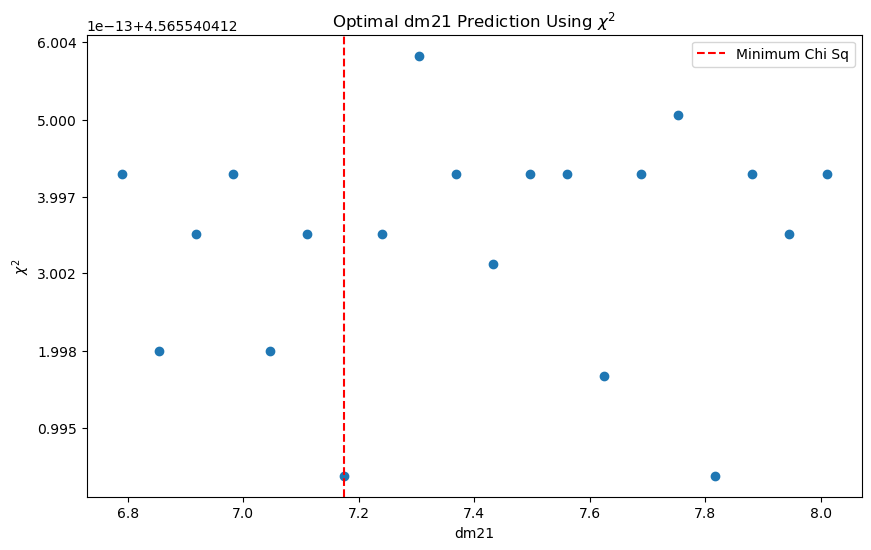

In [171]:
fig = hits_to_plot_no_norm(sims_sfho, data_sim, 50*u.ms,1*u.kpc,np.linspace(6.79,8.01,20), 
                   r'dm21', r'Optimal dm21 Prediction Using $\chi^2$', 7.39, 1)
#plt.savefig('chi_s1_dist.png', dpi=300, bbox_inches='tight')

(array([45.,  1.,  1.,  2.,  3.,  1.,  1.,  2.,  0., 44.]),
 array([8.22 , 8.297, 8.374, 8.451, 8.528, 8.605, 8.682, 8.759, 8.836,
        8.913, 8.99 ]),
 <BarContainer object of 10 artists>)

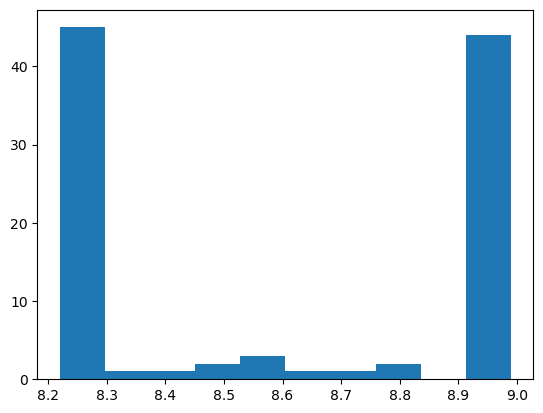

In [120]:
chi_mins, theta_mins = hits_to_thetas(sims_sfho, data_sim, 50*u.ms, 5*u.kpc,np.linspace(8.22,8.99,20), 100)
plt.hist(theta_mins)

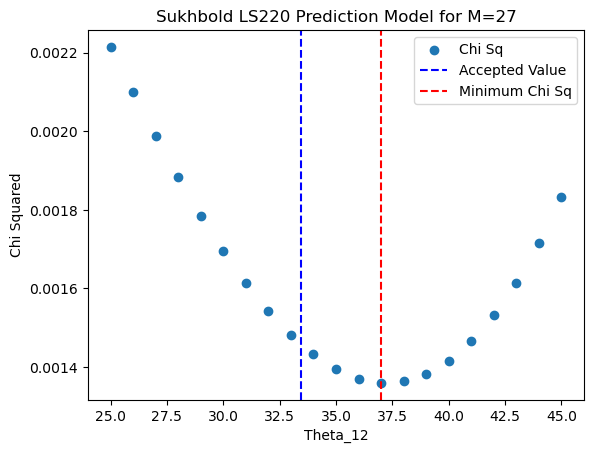

In [164]:
plt.scatter(theta12,chi_ls220,label='Chi Sq')
plt.axvline(x=33.44, color='blue', linestyle='--',label='Accepted Value')
plt.axvline(x=theta12[np.argmin(chi_ls220)], color='r', linestyle='--',label='Minimum Chi Sq')
plt.xlabel('Theta_12')
plt.ylabel('Chi Squared')
plt.title('Sukhbold LS220 Prediction Model for M=27')
plt.legend()

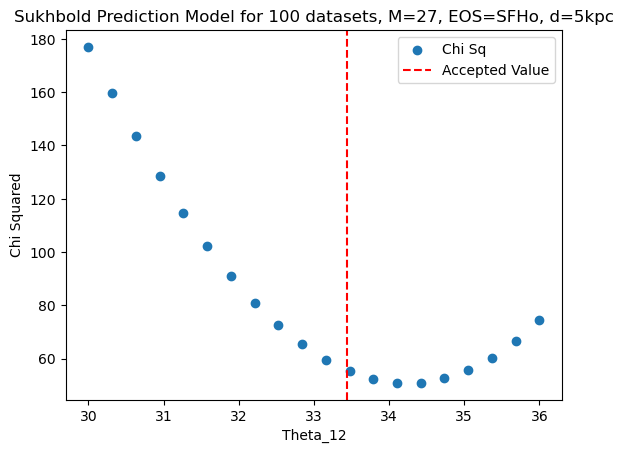

In [216]:
plt.scatter(theta12,chi_sqs_reg,label='Chi Sq')
plt.axvline(x=33.44, color='r', linestyle='--',label='Accepted Value')
plt.xlabel('Theta_12')
plt.ylabel('Chi Squared')
plt.title('Sukhbold Prediction Model for 100 datasets, M=27, EOS=SFHo, d=5kpc')
plt.legend()

In [64]:
sens

[0.0026315789473656537,
 0.0026315789473656537,
 0.0026315789473656537,
 0.0026315789473656537,
 0.0026315789473656537,
 0.0026315789473656537,
 0.0026315789473656537,
 0.0026315789473656537,
 0.0026315789473656537,
 0.48789473684210805,
 0.24789473684210606,
 0.24263157894736764,
 0.24789473684210606,
 0.24789473684210606,
 0.48789473684210805,
 1.2289473684210535,
 0.9784210526315817,
 0.0026315789473656537,
 0.7384210526315798,
 0.0026315789473656537]

In [140]:
dists=np.linspace(1,12,12)
sens=[]
for i,dist in enumerate(dists):
    theta_mins=sims_to_theta_min(sims_sfho,data_sim,np.linspace(.61,16.61,20),dist*u.kpc,50*u.ms,500)
    sens.append(np.std(theta_mins))
    
plt.step(dists,sens,color='blue',where='post')

plt.axhline(y=.78, color='grey', linestyle='--', linewidth=1)
plt.text(8, .78+.02, 'Current 1$\sigma$ Range', color='grey', ha='center')

plt.title('Sukhbold SFHo Theta_13 Sensitivity for 100 trials')
plt.ylabel(f'$\sigma$ of Predicted Theta_13')
plt.xlabel('Progenitor Distance (kpc)')
#plt.ylim(1,10)
#plt.xlim(7.5,30)

  3%|██▋                                                                            | 17/500 [00:04<01:55,  4.17it/s]


KeyboardInterrupt: 

In [139]:
np.savez('sensitivity_sukh_theta13.npz',sens)

In [60]:
sens=np.load('sensitivity_sukh_theta12.npz',allow_pickle=True)['arr_0']

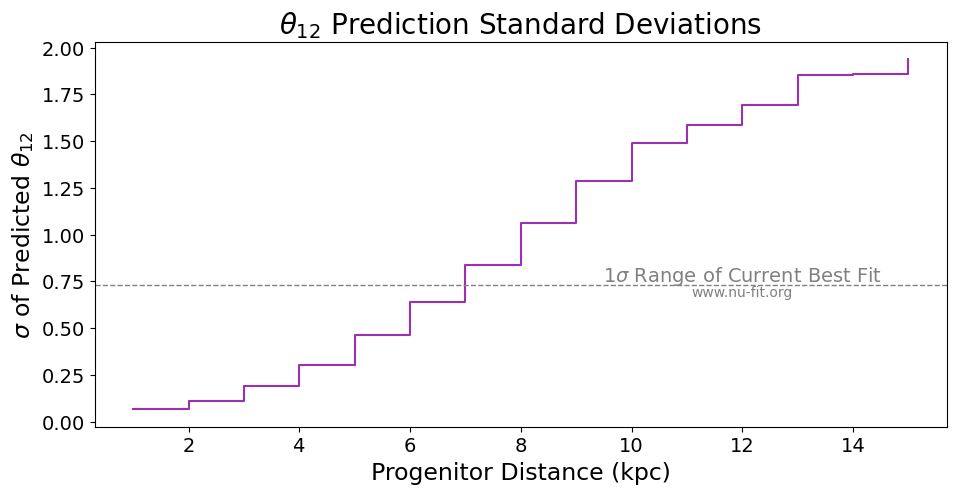

In [61]:
dists=np.linspace(1,15,15)
plt.figure(figsize=(11, 5))
plt.step(dists,sens,color='#9b30b3',where='post')

plt.axhline(y=.73, color='grey', linestyle='--', linewidth=1)
plt.text(12, .73+.02, '1$\sigma$ Range of Current Best Fit', color='grey', ha='center',fontsize=14)
plt.text(12, .73-.06, 'www.nu-fit.org', color='grey', ha='center')

plt.tick_params(axis='both', which='major', labelsize=14)
plt.title(r'$\theta_{12}$ Prediction Standard Deviations',fontsize=20)
plt.ylabel(r'$\sigma$ of Predicted $\theta_{12}$',fontsize=17)
plt.xlabel('Progenitor Distance (kpc)',fontsize=17)
plt.savefig('sigs_t12.png', dpi=300, bbox_inches='tight')

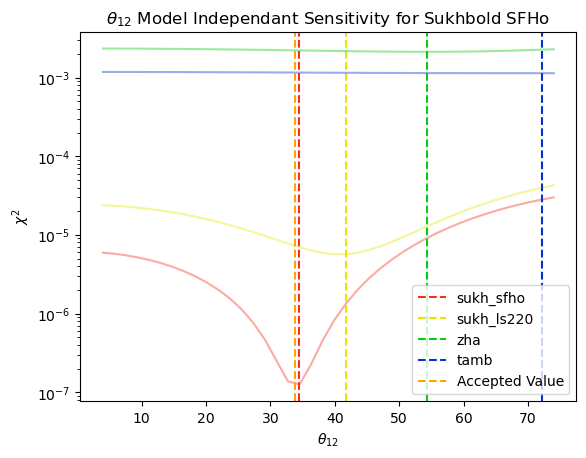

In [190]:
all_sims=[sims_sfho,sims_ls220,sims_zha,sims_tamb]
mod_names=['sukh_sfho','sukh_ls220','zha','tamb']
colors=['#fc2b1c','#e6e602','#02cf13','#0232cf','#9200b3']
fig = hits_to_plot_model_ind(all_sims, data_sim, 50*u.ms, np.linspace(4,74,40), 
                   r'$\theta_{12}$', r'$\theta_{12}$ Model Independant Sensitivity for Sukhbold SFHo', 33.82, 1000,
                            colors,mod_names)

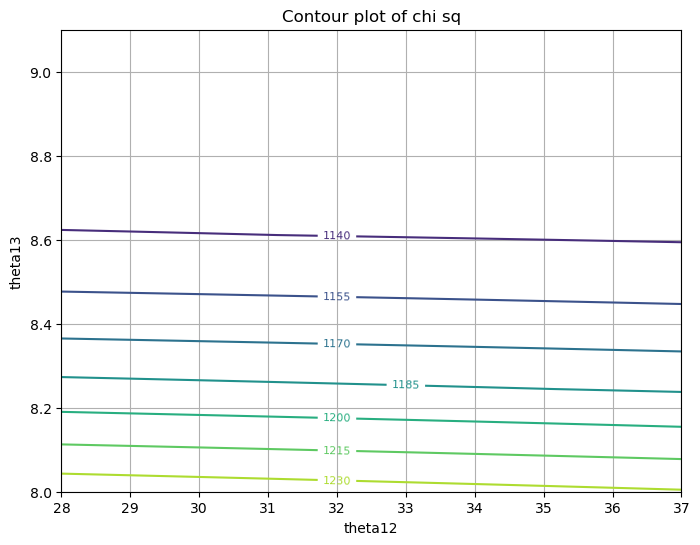

In [59]:
theta12 = np.linspace(28, 37, 10)
theta13 = np.linspace(8, 9.1, 10)

plt.figure(figsize=(8, 6))

#levels = np.linspace(np.min(chi_sqs), np.max(chi_sqs), 10)
contour = plt.contour(theta12, theta13, chi_sqs,levels=10)
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel('theta13')
plt.ylabel('theta12')
plt.title('Contour plot of chi sq')
plt.grid(True)
plt.show()

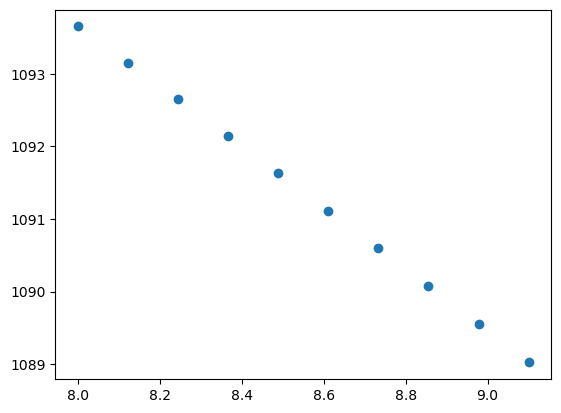

In [35]:
chi_sqs=np.array(chi_sqs)
chi_sq_12=chi_sqs[1,:]
plt.scatter(theta13, chi_sq_12)

In [56]:
chi_sq_13=chi_sqs[:,5]
plt.scatter(theta12, chi_sq_13)

TypeError: list indices must be integers or slices, not tuple